In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-03-29 15:35:55--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.2
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  81.6MB/s    in 0.3s    

2022-03-29 15:35:55 (81.6 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [ ]:
image = cv2.imread('./images/flowers.jpeg')


## Color spaces

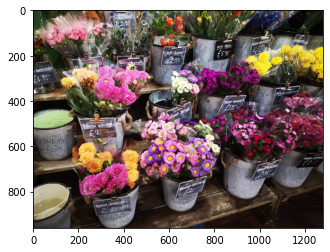

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

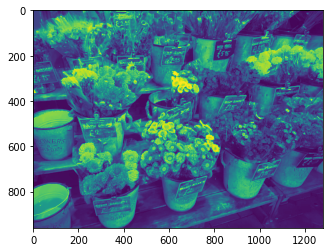

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
plt.show()

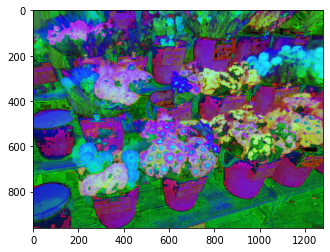

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
plt.show()

## Drawing on Images

In [ ]:
def imshow(title = "Image", image=None, size=10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()


## Thresholding
  1. Binary thresholding
    1. Binary thresholding
    2. Binary Inverse thresholding
    3. Trunc
    4. To zero
    5. To zero inverse
  2. Adaptive thresholding
    1. Adaptive thresholding mean
    2. Otsu thresholding





In [ ]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2022-03-29 15:48:34--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.01s   

2022-03-29 15:48:35 (15.9 MB/s) - ‘scan.jpeg’ saved [171933/171933]



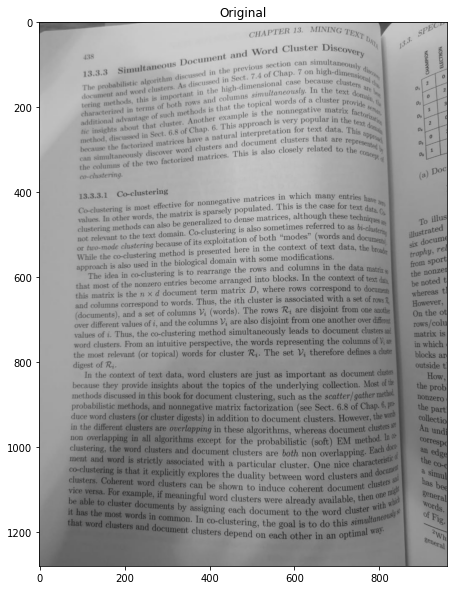

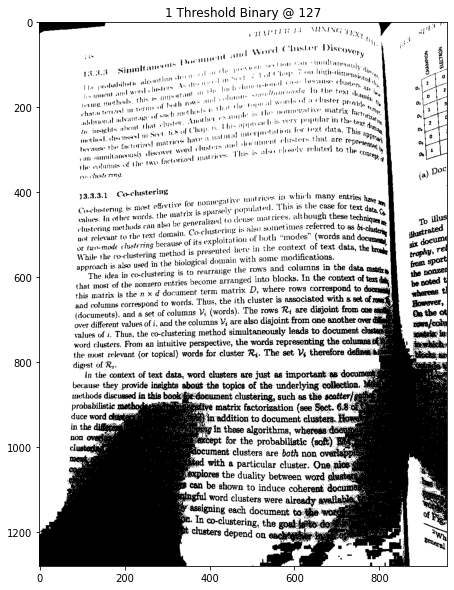

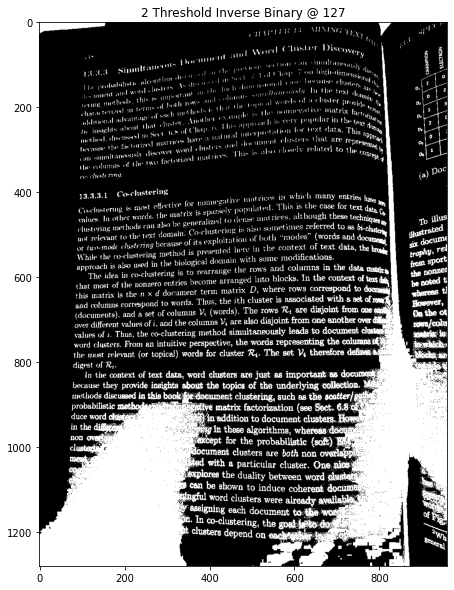

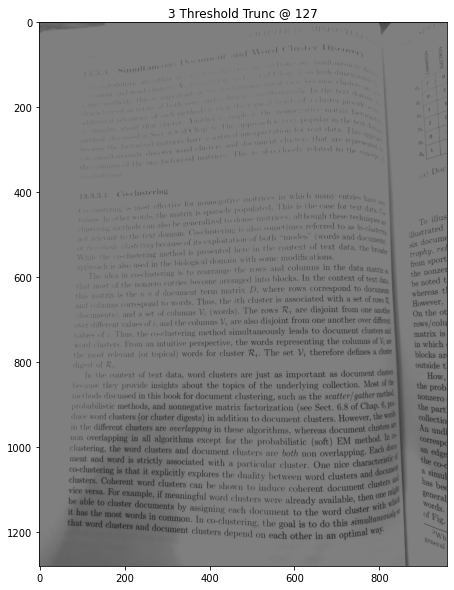

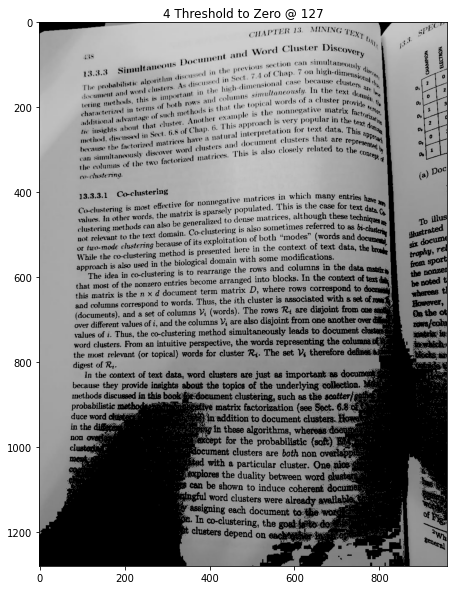

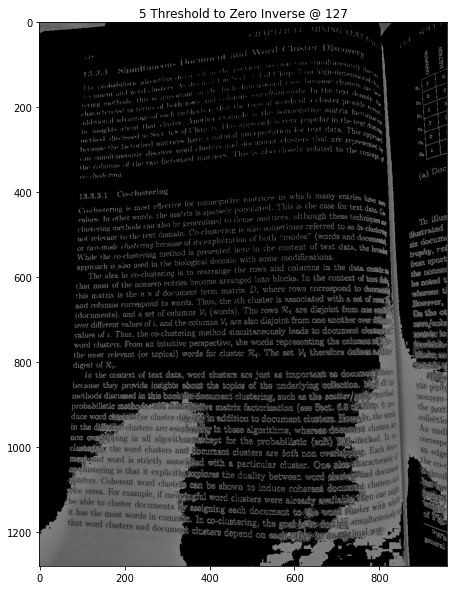

In [ ]:
# BINARY THRESHOLDING

# Load our image as greyscale 
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

_, thresh1 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

_, thresh2 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Inverse Binary @ 127', thresh2)

_, thresh3 = cv2.threshold(image, 127,255, cv2.THRESH_TRUNC)
imshow('3 Threshold Trunc @ 127', thresh3)

_, thresh4 = cv2.threshold(image, 127,255, cv2.THRESH_TOZERO)
imshow('4 Threshold to Zero @ 127', thresh4)

_, thresh5 = cv2.threshold(image, 127,255, cv2.THRESH_TOZERO_INV)
imshow('5 Threshold to Zero Inverse @ 127', thresh5)

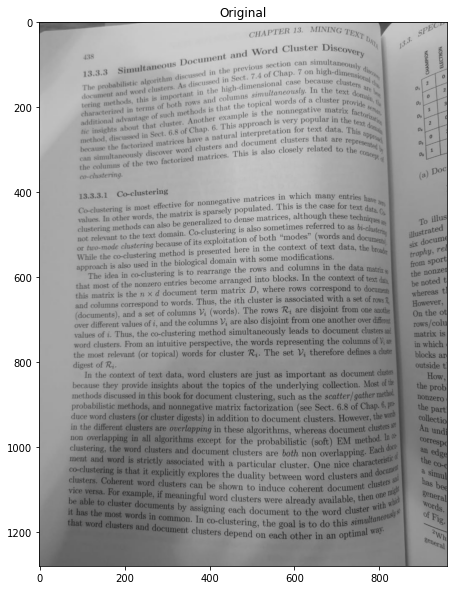

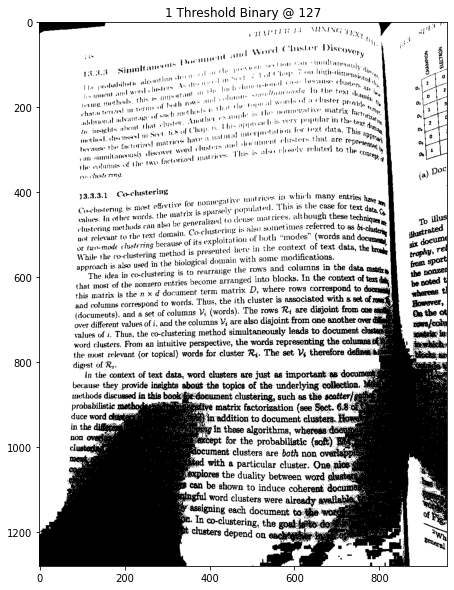

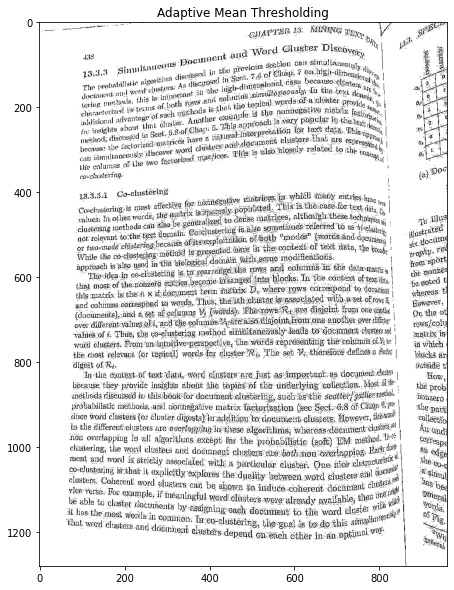

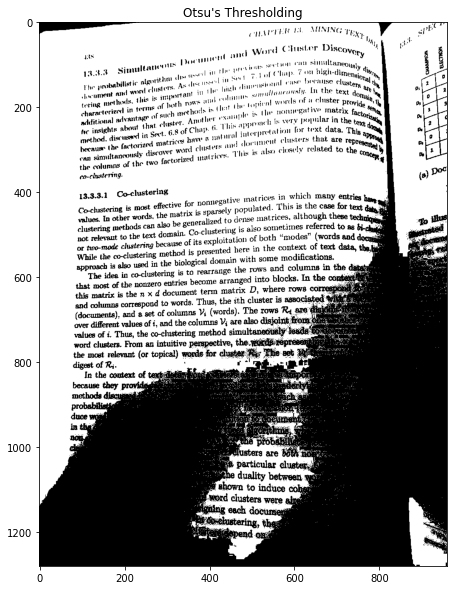

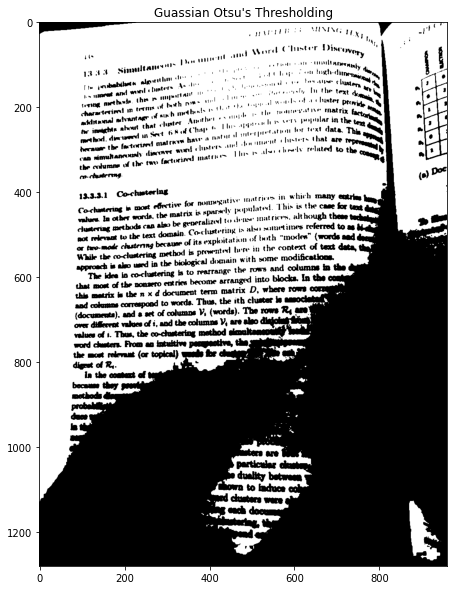

In [ ]:
# ADAPTIVE THRESHOLDING

image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

_, thresh1 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 


## SkImage Threshold local


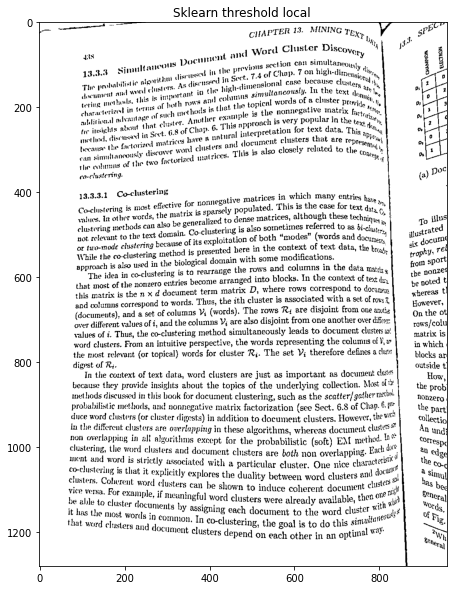

In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

threshold = (V > T).astype("uint8") * 255
imshow("Sklearn threshold local ", threshold)

## Dilation, Erosion, Opening, Closing

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-03-29 16:30:18--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.158
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  90.1MB/s    in 0.3s    

2022-03-29 16:30:19 (90.1 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace __MACOSX/images/._castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace images/londonxmas2.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace __MACOSX/images/._londonxma

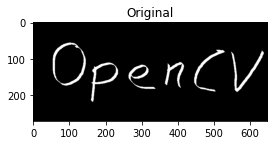

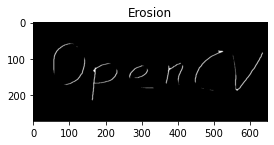

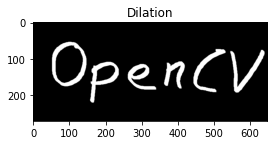

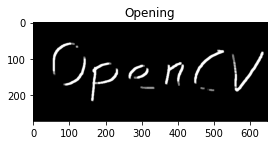

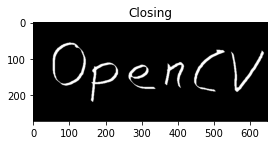

In [ ]:
image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations=1)
imshow("Erosion", erosion)

dilation = cv2.dilate(image, kernel, iterations=1)
imshow("Dilation", dilation)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow("Opening", opening)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow("Closing", closing)
